Coronavirus demo
----------------

To use this demo first open a terminal and run:
```
mkdir labfolder
docker run --rm -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v labfolder:/home/jovyan/work ontresearch/nanolabs-notebook
```
This will start a jupyter notebook server on your local computer. When it is running you will see a message like:
```
or http://127.0.0.1:8888/?token=c0bc8ed20519537bd2f817834f235473a85a7ef20f7a31b9
```
copy the long string after `token=`. In the colab interface find the connect to local runtime option:

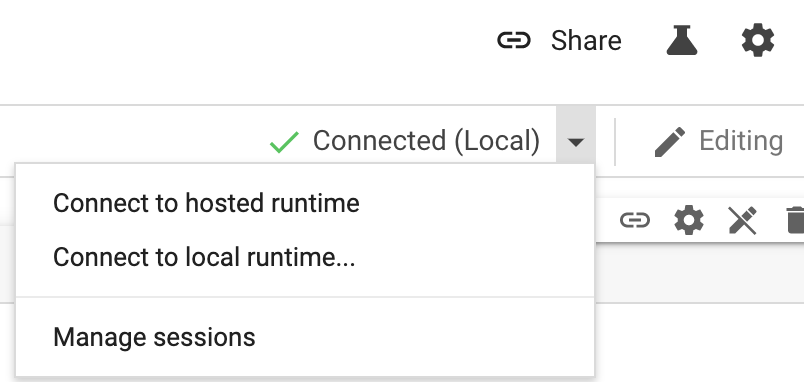

and enter the following in the text box:
```
http://localhost:8888/?token=<tokenfromabove>
```

This will connect colab to your local jupyter server running via docker. Once connected we are ready to start.


First we will download some nanopore data from the SRA:



In [0]:
!wget https://sra-download.ncbi.nlm.nih.gov/traces/sra45/SRZ/010948/SRR10948550/HKU-SZ-002a.fastq

and also download a reference genome:

In [0]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/refseq/viral/Wuhan_seafood_market_pneumonia_virus/all_assembly_versions/GCF_009858895.2_ASM985889v3/GCF_009858895.2_ASM985889v3_genomic.fna.gz

# A little looked at the data

First we can aligned the reads to the reference

In [0]:
!mini_align -r GCF_009858895.2_ASM985889v3_genomic.fna.gz -i HKU-SZ-002a.fastq -p reads2ref -t 4

Then calculate some statistics on the alignments

In [0]:
!stats_from_bam reads2ref.bam > reads.stats

And then plot some information from the data table...

In [0]:
import pandas
import seaborn as sns
d = pandas.read_table("reads.stats")
sns.distplot(d['acc'])

In [0]:
!coverage_from_bam reads2ref.bam -s 10

In [0]:
e = pandas.read_table("reads2ref_NC_045512.2_0_29903.depth.txt")
e.head()
sns.lineplot(e['pos'], e['depth'])

# Variant Calling with medaka

The following little workflow demonstrates minimal SNP calling by aligning reads to the reference sequence

Running `medaka`'s RNN on the alignments produced above:

In [0]:
!rm -rf reads2ref.hdf
!medaka consensus reads2ref.bam reads2ref.hdf --threads 4

and post processing the results into a Variant Call Format file:

In [0]:
!gunzip -f GCF_009858895.2_ASM985889v3_genomic.fna.gz
!medaka snp GCF_009858895.2_ASM985889v3_genomic.fna reads2ref.hdf ont.snp.vcf

and view the called variants

In [0]:
!cat ont.snp.vcf